In [110]:
#Importing All libraries
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.multiclass import unique_labels
import pandas as pd
import seaborn as sns

In [111]:
#structure of data
print('Dimension of Dataset')
print(iris.data.shape)
labels = ['Sepal Length','Sepal Width', 'Petal Length', 'Petal Width']
classes= ['Iris Virginica','Iris Versicolor','Iris Setosa']
data = pd.DataFrame(iris.data,index=np.arange(iris.data.shape[0]),columns = labels)
data.head()


Dimension of Dataset
(150, 4)


,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


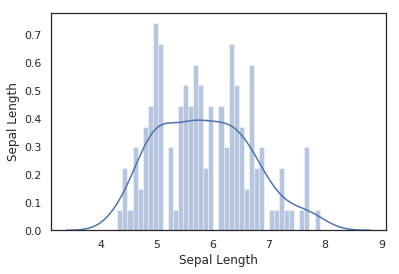

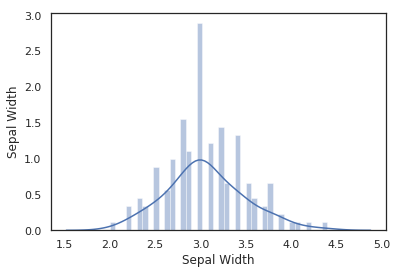

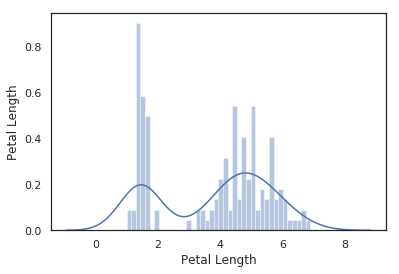

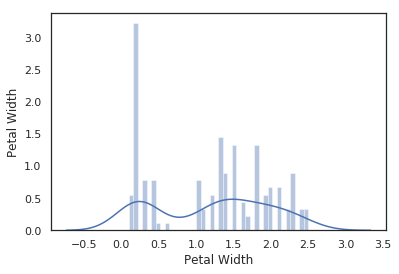

In [112]:
#distribution of data
for i in range(4):
    sns.distplot(iris.data[:,i],kde=True,bins=40)
    plt.ylabel(str(labels[i]))
    plt.xlabel(str(labels[i]))
    plt.show()


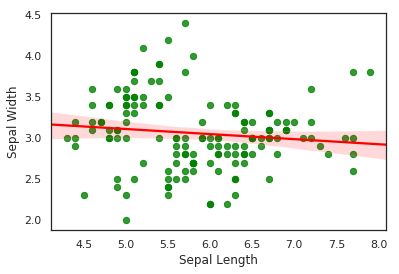

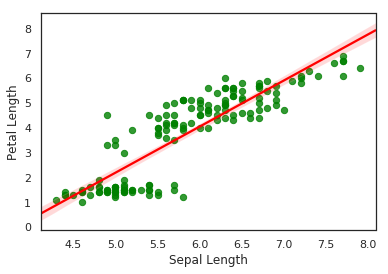

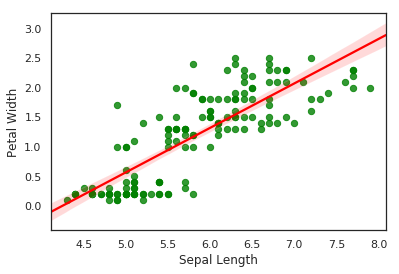

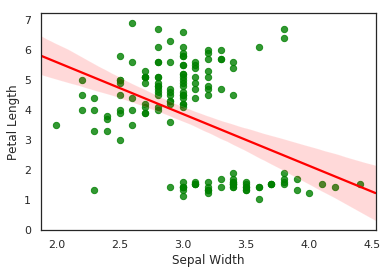

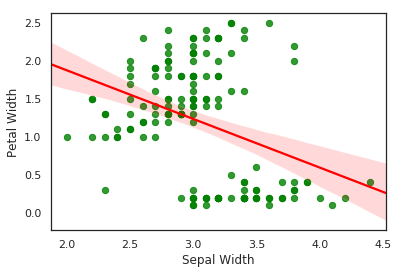

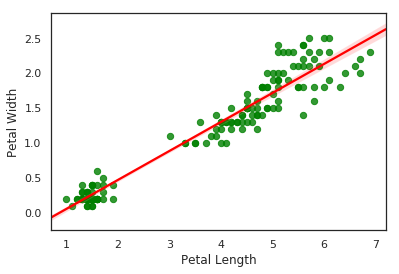

In [113]:
#Regression plot
for i in range(4):
    for j in range(i,4):
        if(i!=j):   
            
            sns.regplot(x=iris.data[:,i], y=iris.data[:,j],
                        scatter_kws={"color":"green","alpha":0.8,"s":40},
                        line_kws={"color": "red"})
            sns.set(style="white",color_codes=True)
            plt.xlabel(str(labels[i]))
            plt.ylabel(str(labels[j]))
            plt.show()

Class representation
0 :	Iris-versicolor 
1 :	Iris-setosa
2 :	Iris-virginica


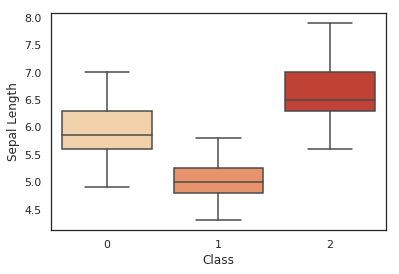

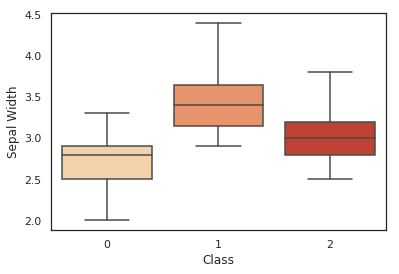

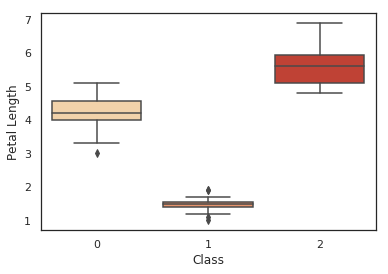

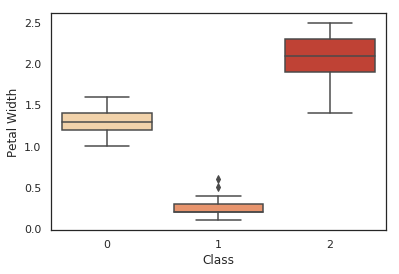

In [141]:
#box plot
print('Class representation')
print('0 :\tIris-%s ' %iris.target_names[1])
print('1 :\tIris-%s' %iris.target_names[0])
print('2 :\tIris-%s' %iris.target_names[2])


for i in range(4):
    sns.boxplot(x='class',y=iris.data[:,i],data=train,palette='OrRd')
    plt.xlabel(str('Class'))
    plt.ylabel(str(labels[i]))
    plt.show()              

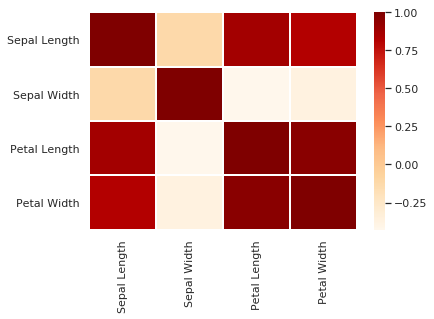

In [98]:
#heat map
sns.heatmap(data.corr(),cmap="OrRd", linecolor='white', linewidths=1)
plt.show()

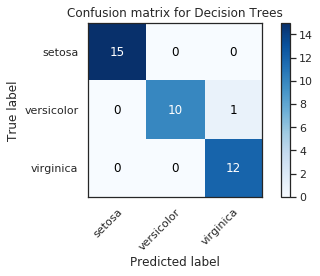

The accuracy of train set for Decision Tree:	94.643 %
The accuracy of the test set for Decision Tree:	97.368 %


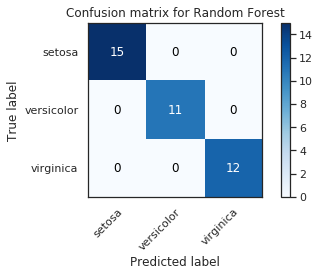


The accuracy of train set Random Forest: 	100.000 %
The accuracy of the test set Random Forest: 	100.000 %


In [148]:
#load data
iris = load_iris()
class_names = iris.target_names

#training data
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 42)

DT = DecisionTreeClassifier(max_leaf_nodes = 3).fit(X_train, y_train)
RF = RandomForestClassifier().fit(X_train, y_train)

DT_pred = DT.predict(X_test)
RF_pred = RF.predict(X_test)

#function for confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes,normalize=False,
                          title=None,cmap=plt.cm.Blues):
   
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, DT_pred)]
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot confusion matrix for Decision tree
plot_confusion_matrix(y_test, DT_pred, classes=class_names,
                      title='Confusion matrix for Decision Trees')
plt.show()

print('The accuracy of train set for Decision Tree:\t{:.3f} %' .format(DT.score(X_train, y_train)*100))
print('The accuracy of the test set for Decision Tree:\t{:.3f} %' .format(DT.score(X_test, y_test)*100))

# Plot confusion matrix for Random Forest
plot_confusion_matrix(y_test, RF_pred, classes=class_names,
                      title='Confusion matrix for Random Forest')
plt.show()
print('\nThe accuracy of train set Random Forest: \t{:.3f} %' .format(RF.score(X_train, y_train)*100))
print('The accuracy of the test set Random Forest: \t{:.3f} %' .format(RF.score(X_test, y_test)*100))


train shape:   
(120, 5)
test shape:    
(30, 5)
Unique classes with count : 
Iris-setosa        43
Iris-virginica     39
Iris-versicolor    38
Name: class, dtype: int64
data description : 
       sepal_length  sepal_width  petal_length  petal_width
count    120.000000   120.000000    120.000000   120.000000
mean       5.833333     3.059167      3.675000     1.165833
std        0.849848     0.436274      1.804628     0.775843
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.500000     0.300000
50%        5.700000     3.000000      4.150000     1.300000
75%        6.400000     3.300000      5.100000     1.825000
max        7.900000     4.400000      6.900000     2.500000
<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 126 to 25
Data columns (total 5 columns):
sepal_length    120 non-null float64
sepal_width     120 non-null float64
petal_length    120 non-null float64
petal_width     120 non-null float64
class           1

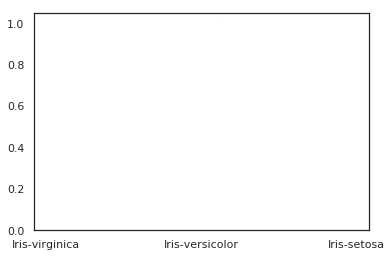

Sepal_length


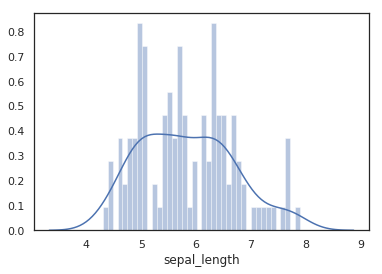

Sepal_width


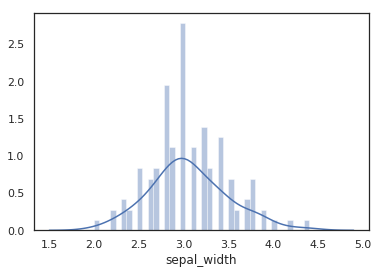

Petal_length


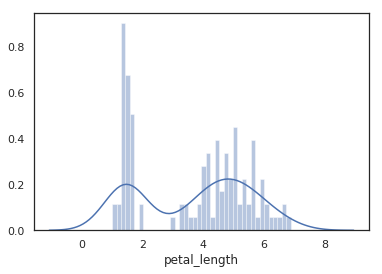

Petal_width


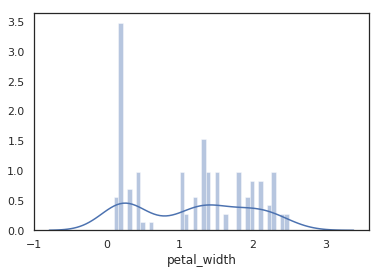

bivariate analysis


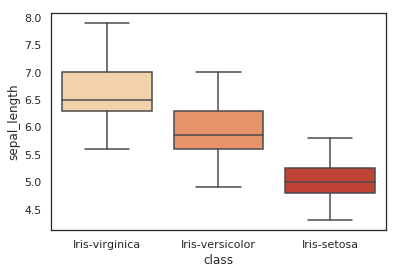

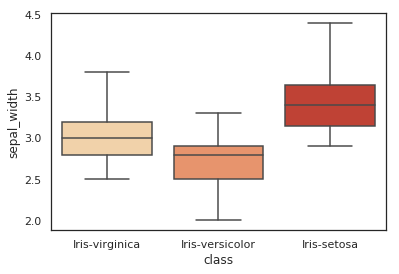

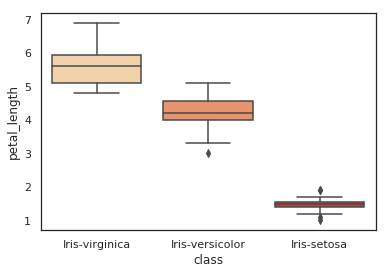

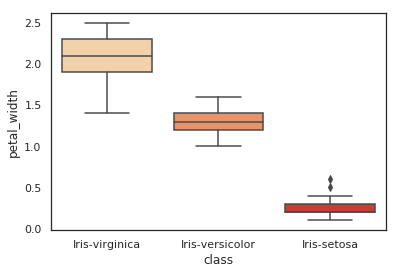

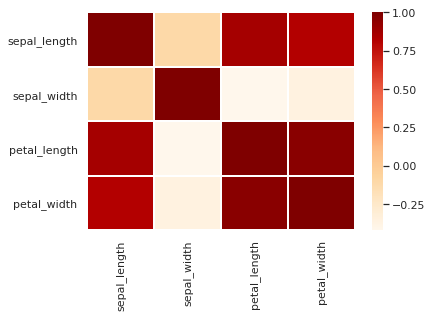

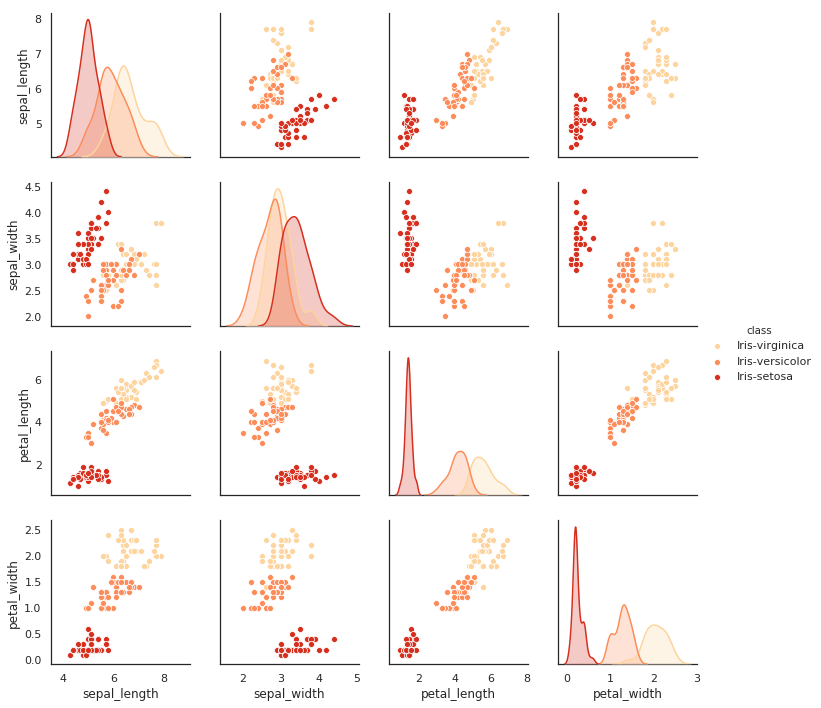

/home/hemant/.local/lib/python2.7/site-packages/ipykernel_launcher.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/hemant/.local/lib/python2.7/site-packages/pandas/core/generic.py:8682: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/home/hemant/.local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2878: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/hemant/.local/lib/python2.7/s

LR: 0.966667 (0.040825)
DT: 0.975000 (0.038188)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)
SVC Performance
0.9333333333333333
[[10  0  2]
 [ 0  7  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      0.83      0.91        12
           1       1.00      1.00      1.00         7
           2       0.85      1.00      0.92        11

   micro avg       0.93      0.93      0.93        30
   macro avg       0.95      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30

KNN Performance
0.9
[[11  0  1]
 [ 0  7  0]
 [ 2  0  9]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        12
           1       1.00      1.00      1.00         7
           2       0.90      0.82      0.86        11

   micro avg       0.90      0.90      0.90        30
   macro avg       0.92      0.91      0.91        30
weighted avg     

/home/hemant/.local/lib/python2.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [80]:
#importing libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


#loading data
path="https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data=pd.read_csv(path,header=None,names=['sepal_length','sepal_width','petal_length','petal_width','class'])
train,test = train_test_split(data,test_size=0.2,random_state=7)
#analysing data
print "train shape:   "
print train.shape
print "test shape:    "
print test.shape
print "Unique classes with count : "
print pd.value_counts(train['class'])
print "data description : "
print train.describe()

#checking missing values
print train.info()
#No null values

#Exploratory data analysis
print "Univariate analysis"
print "Target Class"
plt.hist(train['class'])
plt.show()
print "Sepal_length"
sns.distplot(train['sepal_length'],kde=True,bins=40)
plt.show()
print "Sepal_width"
sns.distplot(train['sepal_width'],kde=True,bins=40)
plt.show()
print "Petal_length"
sns.distplot(train['petal_length'],kde=True,bins=40)
plt.show()
print "Petal_width"
sns.distplot(train['petal_width'],kde=True,bins=40)
plt.show()
print "bivariate analysis"
sns.boxplot(x='class',y='sepal_length',data=train,palette='OrRd')
plt.show()
sns.boxplot(x='class',y='sepal_width',data=train,palette='OrRd')
plt.show()
sns.boxplot(x='class',y='petal_length',data=train,palette='OrRd')
plt.show()
sns.boxplot(x='class',y='petal_width',data=train,palette='OrRd')
plt.show()
sns.heatmap(data.corr(),cmap="OrRd", linecolor='white', linewidths=1)
plt.show()
sns.pairplot(train, hue='class',palette='OrRd')
plt.show()

#Modelling
train['class'][train['class']=='Iris-versicolor']=0
train['class'][train['class']=='Iris-setosa']=1
train['class'][train['class']=='Iris-virginica']=2
test['class'][test['class']=='Iris-versicolor']=0
test['class'][test['class']=='Iris-setosa']=1
test['class'][test['class']=='Iris-virginica']=2
X = train.iloc[:,:-1]
y = train.iloc[:,-1]
y = pd.to_numeric(y)
y_test=pd.to_numeric(test.iloc[:,-1])



# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
scoring = 'accuracy'


results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=7)
	cv_results = model_selection.cross_val_score(model, X,y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

#lets make prediction on test data

# Make predictions on validation dataset
print "SVC Performance"
SVM = SVC()
SVM.fit(X,y)
predictions = SVM.predict(test.iloc[:,:-1])
print (accuracy_score(y_test, predictions))
print (confusion_matrix(y_test, predictions))
print (classification_report(y_test, predictions))

print "KNN Performance"
KNN = KNeighborsClassifier()
KNN.fit(X,y)
predictions = KNN.predict(test.iloc[:,:-1])
print (accuracy_score(y_test, predictions))
print (confusion_matrix(y_test, predictions))
print (classification_report(y_test, predictions))